<a href="https://colab.research.google.com/github/Abhilash2240/STML/blob/main/Assignment_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
file_path = '/content/breast_cancer_survival.csv'
data = pd.read_csv(file_path)
data.head(), data.info(), data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 334 non-null    int64  
 1   Gender              334 non-null    object 
 2   Protein1            334 non-null    float64
 3   Protein2            334 non-null    float64
 4   Protein3            334 non-null    float64
 5   Protein4            334 non-null    float64
 6   Tumour_Stage        334 non-null    object 
 7   Histology           334 non-null    object 
 8   ER status           334 non-null    object 
 9   PR status           334 non-null    object 
 10  HER2 status         334 non-null    object 
 11  Surgery_type        334 non-null    object 
 12  Date_of_Surgery     334 non-null    object 
 13  Date_of_Last_Visit  317 non-null    object 
 14  Patient_Status      321 non-null    object 
dtypes: float64(4), int64(1), object(10)
memory usage: 39.3+ K

(   Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
 0   42  FEMALE   0.95256   2.15000  0.007972 -0.048340           II   
 1   54  FEMALE   0.00000   1.38020 -0.498030 -0.507320           II   
 2   63  FEMALE  -0.52303   1.76400 -0.370190  0.010815           II   
 3   78  FEMALE  -0.87618   0.12943 -0.370380  0.132190            I   
 4   42  FEMALE   0.22611   1.74910 -0.543970 -0.390210           II   
 
                        Histology ER status PR status HER2 status Surgery_type  \
 0  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
 1  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
 2  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   Lumpectomy   
 3  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
 4  Infiltrating Ductal Carcinoma  Positive  Positive    Positive   Lumpectomy   
 
   Date_of_Surgery Date_of_Last_Visit Patient_Status  
 0       20-May-1

Mounted at /content/drive


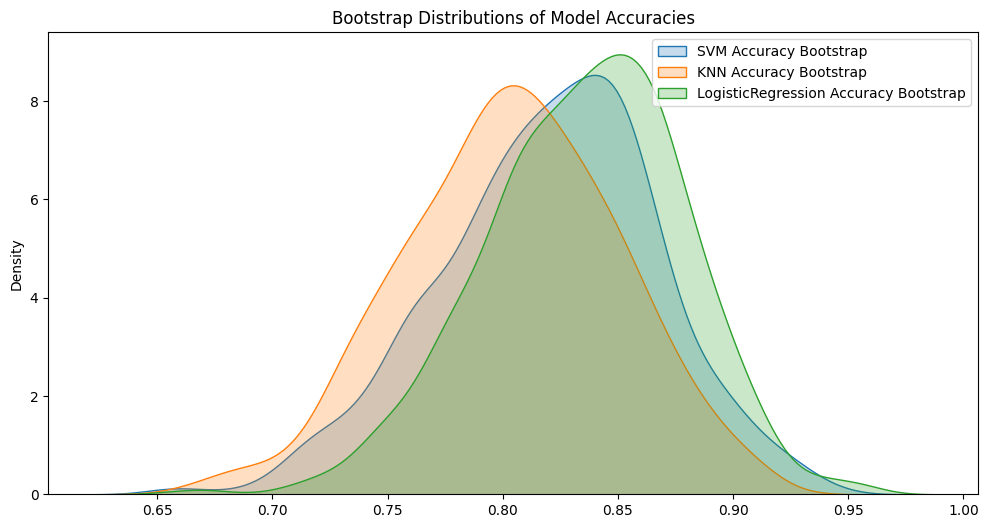

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/breast_cancer_survival.csv')
data = pd.get_dummies(data, drop_first=True)

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "LogisticRegression": LogisticRegression(max_iter=1000)
}

results = {}
bootstraps = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results[name] = accuracy

    boot_accuracy = []
    for _ in range(1000):
        boot_X, boot_y = resample(X_test, y_test)
        boot_pred = model.predict(boot_X)
        boot_accuracy.append(accuracy_score(boot_y, boot_pred))
    bootstraps[name] = boot_accuracy

plt.figure(figsize=(12, 6))
for name, boot in bootstraps.items():
    sns.kdeplot(boot, label=f'{name} Accuracy Bootstrap', fill=True)
plt.legend()
plt.title('Bootstrap Distributions of Model Accuracies')
plt.show()

print("Model Accuracies:", results)